In [1]:
# numerically solving for the numerator of lambda

In [2]:
import math
import numpy as np 
import scipy
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
import matplotlib 
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

### Solving the system of ODEs 

In [3]:
psis_rho = []

# rhos = np.logspace(-3, 3, int(1e1))
rhos = [0, 0.01, 0.1, 1, 10, 100]

for rho in rhos:
    def system(t, psi, rho):
        psi_0, psi_1x, psi_1y, psi_1z, psi_2xy, psi_2xz, psi_2yz, psi_3xyz = psi
    
        d_psi_0 = - rho*psi_0 - psi_0**2 + 2*rho/(1+t) # w/ psi0_0 = 2

        d_psi_1x = - rho*psi_1x - 2*psi_0*psi_1x + rho/(1+t)**2 # w/ psi0_1x = 0
        d_psi_1y = - rho*psi_1y - 2*psi_0*psi_1y + rho/(1+t)**2 # w/ psi0_1y = 0
        d_psi_1z = - rho*psi_1z - 2*psi_0*psi_1z # w/ psi0_1z = 1

        d_psi_2xy = - rho*psi_2xy - 2*psi_0*psi_2xy - 4*psi_1x*psi_1y # w/ psi0_2xy = 0
        d_psi_2xz = - rho*psi_2xz - 2*psi_0*psi_2xz - 4*psi_1x*psi_1z # w/ psi0_2xz = 0
        d_psi_2yz = - rho*psi_2yz - 2*psi_0*psi_2yz - 4*psi_1y*psi_1z # w/ psi0_2yz = 0

        d_psi_3xyz = - rho*psi_3xyz - 2*psi_0*psi_3xyz - 6*psi_1x*psi_2yz - 6*psi_1y*psi_2xz - 6*psi_1z*psi_2xy  # w/ psi0_3xyz = 0
    
        return d_psi_0, d_psi_1x, d_psi_1y, d_psi_1z, d_psi_2xy, d_psi_2xz, d_psi_2yz, d_psi_3xyz
    
    psi0 = [2, 0, 0, 1, 0, 0, 0, 0] # initial conditions
    
    soln = solve_ivp(system, [0, 1e4], psi0, args=[rho], dense_output=True) # solving the equations! 
    
    ts = np.linspace(0, 1e4, int(1e6)) # times to evaluate solution at 
    interp = soln.sol(ts)
    psis_rho.append(interp)
    
    
    

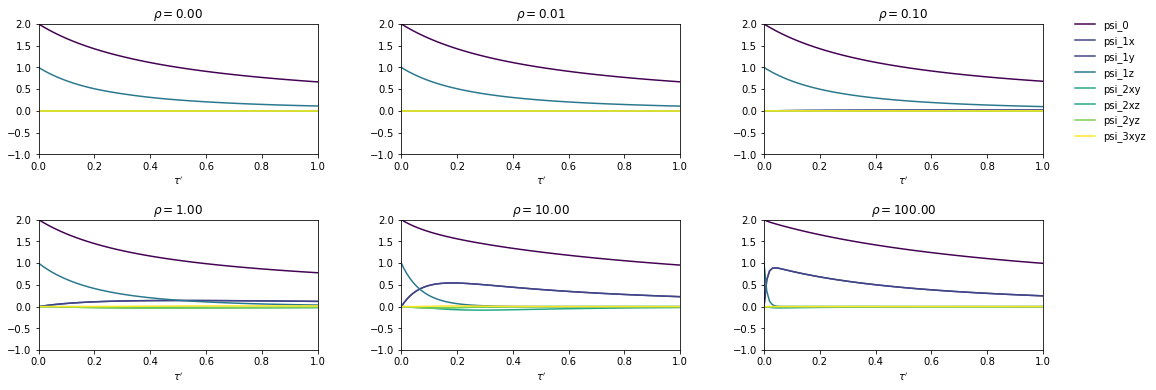

In [5]:
T = 1

labels = ['psi_0', 'psi_1x', 'psi_1y', 'psi_1z', 'psi_2xy', 'psi_2xz', 'psi_2yz', 'psi_3xyz']
viridis = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=5), 
                                       cmap=plt.get_cmap('viridis'))
color_ind = [0, 1, 1, 2, 3, 3, 4, 5]

plt.figure(figsize=(18, 6))

grid = gridspec.GridSpec(ncols=3, nrows=2,
                         width_ratios=[1, 1, 1], wspace=0.3,
                         height_ratios=[1, 1], hspace=0.5)

c = 0
for i in range(len(rhos)):
    plt.subplot(grid[c // 3, c % 3])

    for j in range(len(labels)): 
        plt.plot(ts, psis_rho[i][j], label=labels[j], color=viridis.to_rgba(color_ind[j]), alpha=1)
        
        plt.ylim(-1, 2)
        plt.xlim(0, T)
        plt.title(r'$\rho = $' + '{:.2f}'.format(rhos[i]))
        plt.xlabel(r"$\tau'$")
        
        if i == 2:
            plt.legend(frameon=False, ncol=1, loc='upper right', bbox_to_anchor=(1.4, 1.1))
    
    c += 1
    
#plt.savefig('psis_tau=' + str(T) + '_lin.png', dpi=300, bbox_inches='tight')

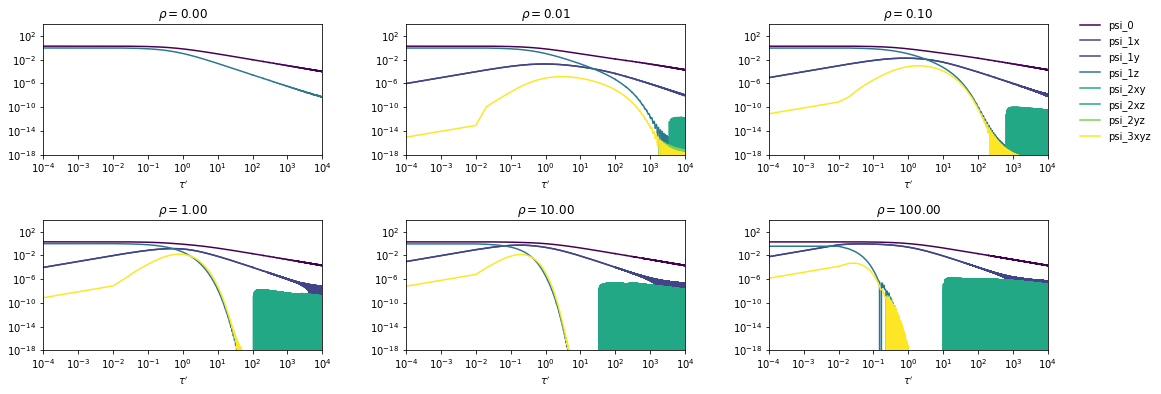

In [6]:
labels = ['psi_0', 'psi_1x', 'psi_1y', 'psi_1z', 'psi_2xy', 'psi_2xz', 'psi_2yz', 'psi_3xyz']
viridis = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=5), 
                                       cmap=plt.get_cmap('viridis'))
color_ind = [0, 1, 1, 2, 3, 3, 4, 5]

plt.figure(figsize=(18, 6))

grid = gridspec.GridSpec(ncols=3, nrows=2,
                         width_ratios=[1, 1, 1], wspace=0.3,
                         height_ratios=[1, 1], hspace=0.5)

c = 0
for i in range(len(rhos)):
    plt.subplot(grid[c // 3, c % 3])

    for j in range(len(labels)): 
        plt.plot(ts, psis_rho[i][j], label=labels[j], color=viridis.to_rgba(color_ind[j]), alpha=1) # would have ideally had log ts
        plt.yscale('log'); plt.minorticks_off()
        plt.xscale('log'); plt.minorticks_off()
        
        plt.ylim(1e-18, 1e4)
        plt.xlim(1e-4, 1e4)
        plt.title(r'$\rho = $' + '{:.2f}'.format(rhos[i]))
        plt.xlabel(r"$\tau'$")
        
        if i == 2:
            plt.legend(frameon=False, ncol=1, loc='upper right', bbox_to_anchor=(1.4, 1.1))
    
    c += 1
    
#plt.savefig('psis_tau_log_log.png', dpi=300, bbox_inches='tight')

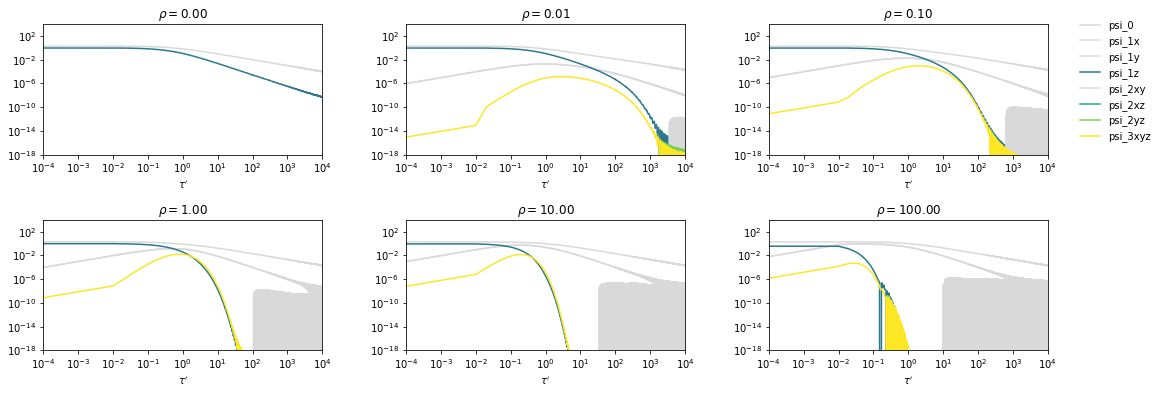

In [7]:
# same as above but now highlighting psis needed to evaluate lambda 

labels = ['psi_0', 'psi_1x', 'psi_1y', 'psi_1z', 'psi_2xy', 'psi_2xz', 'psi_2yz', 'psi_3xyz']
viridis = matplotlib.cm.ScalarMappable(norm=matplotlib.colors.Normalize(vmin=0, vmax=5), 
                                       cmap=plt.get_cmap('viridis'))
color_ind = [0, 1, 1, 2, 3, 3, 4, 5]

plt.figure(figsize=(18, 6))

grid = gridspec.GridSpec(ncols=3, nrows=2,
                         width_ratios=[1, 1, 1], wspace=0.3,
                         height_ratios=[1, 1], hspace=0.5)

c = 0
for i in range(len(rhos)):
    plt.subplot(grid[c // 3, c % 3])

    for j in range(len(labels)): 
        if 'z' in labels[j]:
            color = viridis.to_rgba(color_ind[j])
        else:
            color = '#d9d9d9'
        
        plt.plot(ts, psis_rho[i][j], label=labels[j], color=color, alpha=1) # would have ideally had log ts
        
        plt.yscale('log'); plt.minorticks_off()
        plt.xscale('log'); plt.minorticks_off()
        
        plt.ylim(1e-18, 1e4)
        plt.xlim(1e-4, 1e4)
        plt.title(r'$\rho = $' + '{:.2f}'.format(rhos[i]))
        plt.xlabel(r"$\tau'$")
        
        if i == 2:
            plt.legend(frameon=False, ncol=1, loc='upper right', bbox_to_anchor=(1.4, 1.1))
    
    c += 1
    
# plt.savefig('psis_tau_log_log_grey.png', dpi=300, bbox_inches='tight')

### Evaluating the integrand

In [3]:
# defining the integrand:

def integrand(rho, t, psi_1z_t, psi_2xz_t, psi_2yz_t, psi_3xyz_t):
    return rho*psi_1z_t - 1/2*(1+rho*(1+t))*(psi_2xz_t+psi_2yz_t) + 1/6*(1+t)*(2-rho*(1+t))*psi_3xyz_t

In [36]:
# same as above but w/ fewer time points

psis_rho = []

# rhos = np.logspace(-3, 3, int(1e1))
rhos = [0.001, 0.01, 0.1, 1, 10, 100]

for rho in rhos:
    def system(t, psi, rho):
        psi_0, psi_1x, psi_1y, psi_1z, psi_2xy, psi_2xz, psi_2yz, psi_3xyz = psi
    
        d_psi_0 = - rho*psi_0 - psi_0**2 + 2*rho/(1+t) # w/ psi0_0 = 2

        d_psi_1x = - rho*psi_1x - 2*psi_0*psi_1x + rho/(1+t)**2 # w/ psi0_1x = 0
        d_psi_1y = - rho*psi_1y - 2*psi_0*psi_1y + rho/(1+t)**2 # w/ psi0_1y = 0
        d_psi_1z = - rho*psi_1z - 2*psi_0*psi_1z # w/ psi0_1z = 1

        d_psi_2xy = - rho*psi_2xy - 2*psi_0*psi_2xy - 4*psi_1x*psi_1y # w/ psi0_2xy = 0
        d_psi_2xz = - rho*psi_2xz - 2*psi_0*psi_2xz - 4*psi_1x*psi_1z # w/ psi0_2xz = 0
        d_psi_2yz = - rho*psi_2yz - 2*psi_0*psi_2yz - 4*psi_1y*psi_1z # w/ psi0_2yz = 0

        d_psi_3xyz = - rho*psi_3xyz - 2*psi_0*psi_3xyz - 6*psi_1x*psi_2yz - 6*psi_1y*psi_2xz - 6*psi_1z*psi_2xy  # w/ psi0_3xyz = 0
    
        return d_psi_0, d_psi_1x, d_psi_1y, d_psi_1z, d_psi_2xy, d_psi_2xz, d_psi_2yz, d_psi_3xyz
    
    psi0 = [2, 0, 0, 1, 0, 0, 0, 0] # initial conditions
    
    soln = solve_ivp(system, [0, 1e4], psi0, args=[rho], dense_output=True) # solving the equations! 
    
    ts = np.linspace(0, 1e4, int(1e3)) # times to evaluate solution at 
    interp = soln.sol(ts)
    psis_rho.append(interp)
    
    
    

In [37]:
fs_rho = []
for i in range(len(rhos)):
    fs_rho.append([integrand(rhos[i], ts[j], 
                             psis_rho[i][3][j], # psi_1z_t
                             psis_rho[i][5][j], # psi_2xz_t
                             psis_rho[i][6][j], # psi_2yz_t
                             psis_rho[i][7][j]) # psi_3xyz_t
                   for j in range(len(ts))])
    
    

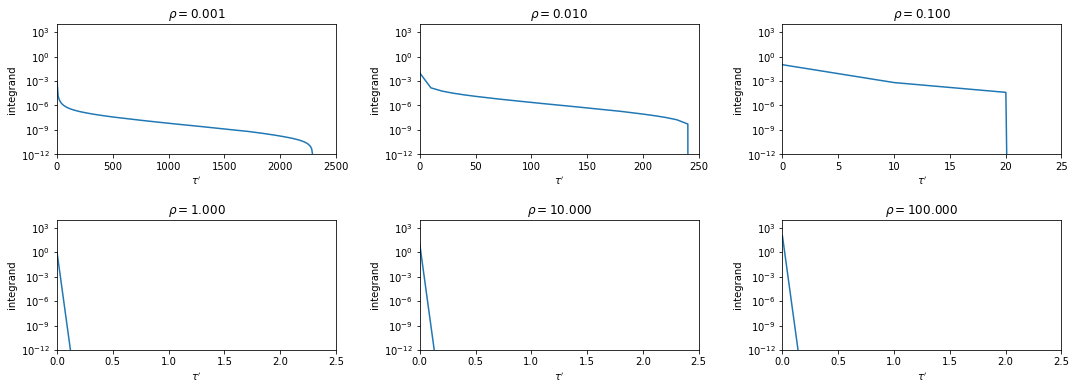

In [38]:
plt.figure(figsize=(18, 6))

grid = gridspec.GridSpec(ncols=3, nrows=2,
                         width_ratios=[1, 1, 1], wspace=0.3,
                         height_ratios=[1, 1], hspace=0.5)

c = 0
for i in range(len(rhos)):
    plt.subplot(grid[c // 3, c % 3])
                
    plt.plot(ts, fs_rho[i]) # would have ideally had log ts
        
    plt.yscale('log'); plt.minorticks_off()
    #plt.xscale('log'); plt.minorticks_off()
    
    xlims = [2500, 250, 25, 2.5, 2.5, 2.5]
        
    plt.ylim(1e-12, 1e4)
    plt.xlim(0, xlims[i])
    plt.title(r'$\rho = $' + '{:.3f}'.format(rhos[i]))
    plt.xlabel(r"$\tau'$")
    plt.ylabel('integrand')
        
    c += 1
    
#plt.savefig('integrand.png', dpi=300, bbox_inches='tight')

### Taking the integral

In [127]:
# same but now w/ different time points for different rhos

psis_rho = []
ts_rho = []

rhos = np.logspace(-4.5, 4.5, int(1e2))

for rho in rhos:
    def system(t, psi, rho):
        psi_0, psi_1x, psi_1y, psi_1z, psi_2xy, psi_2xz, psi_2yz, psi_3xyz = psi
    
        d_psi_0 = - rho*psi_0 - psi_0**2 + 2*rho/(1+t) # w/ psi0_0 = 2

        d_psi_1x = - rho*psi_1x - 2*psi_0*psi_1x + rho/(1+t)**2 # w/ psi0_1x = 0
        d_psi_1y = - rho*psi_1y - 2*psi_0*psi_1y + rho/(1+t)**2 # w/ psi0_1y = 0
        d_psi_1z = - rho*psi_1z - 2*psi_0*psi_1z # w/ psi0_1z = 1

        d_psi_2xy = - rho*psi_2xy - 2*psi_0*psi_2xy - 4*psi_1x*psi_1y # w/ psi0_2xy = 0
        d_psi_2xz = - rho*psi_2xz - 2*psi_0*psi_2xz - 4*psi_1x*psi_1z # w/ psi0_2xz = 0
        d_psi_2yz = - rho*psi_2yz - 2*psi_0*psi_2yz - 4*psi_1y*psi_1z # w/ psi0_2yz = 0

        d_psi_3xyz = - rho*psi_3xyz - 2*psi_0*psi_3xyz - 6*psi_1x*psi_2yz - 6*psi_1y*psi_2xz - 6*psi_1z*psi_2xy  # w/ psi0_3xyz = 0
    
        return d_psi_0, d_psi_1x, d_psi_1y, d_psi_1z, d_psi_2xy, d_psi_2xz, d_psi_2yz, d_psi_3xyz
    
    psi0 = [2, 0, 0, 1, 0, 0, 0, 0] # initial conditions
    
    t_start = 0; t_stop = 5 / rho # start and stop times for integration (stop time determined empirically from the plot above)
    
    soln = solve_ivp(system, [t_start, t_stop], psi0, args=[rho], dense_output=True) # solving the equations! 
    
    ts = np.linspace(t_start, t_stop, int(1e6)) # times to evaluate solution at 
    interp = soln.sol(ts)
    psis_rho.append(interp)
    ts_rho.append(ts)
    
    
    

In [128]:
fs_rho = []
for i in range(len(rhos)):
    fs_rho.append([integrand(rhos[i], ts_rho[i][j], 
                             psis_rho[i][3][j], # psi_1z_t
                             psis_rho[i][5][j], # psi_2xz_t
                             psis_rho[i][6][j], # psi_2yz_t
                             psis_rho[i][7][j]) # psi_3xyz_t
                   for j in range(len(ts_rho[i]))])

In [129]:
lambda_rho = []
for i in range(len(rhos)):
    l = 0
    for j in range(len(ts_rho[i]) - 1):
        l += (ts_rho[i][j + 1] - ts_rho[i][j]) * fs_rho[i][j]
    lambda_rho.append(l)
        

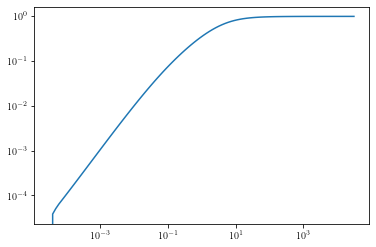

In [143]:
plt.plot(rhos, lambda_rho)
plt.yscale('log'); plt.minorticks_off()
plt.xscale('log'); plt.minorticks_off()

In [131]:
with open('lambda_rho_neutral.txt', 'w+') as o:
    o.writelines(['rho\tlambda\n'] + [str(x) + '\t' + str(y) + '\n' for x, y in zip(rhos, lambda_rho)])

In [132]:
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf');

font = matplotlib.font_manager.FontProperties(fname='/System/Library/Fonts/Supplemental/Avenir.ttf')

In [133]:
plt.rcParams.update({'text.usetex': True,
                        'font.family': "sans-serif",
                        'text.latex.preamble': [r'\usepackage{amsmath}']})

In [134]:
with open('../simulations/LE_r_nruns=1e9_points.txt') as f:
    neutral = [list(map(float, x.split())) for x in f.readlines()] # f*, x (lambda), y (rho)

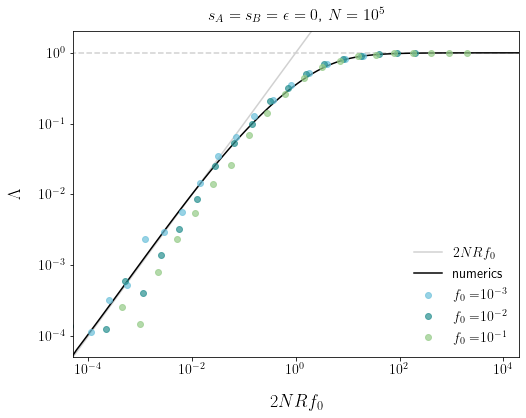

In [137]:
plt.figure(figsize=(8,6))

colors = ['#6DC1DB', '#299191', '#95CB88']

N = 1e5
fs = [0.001, 0.01, 0.1]

plt.loglog(np.logspace(-6.5,5,25), np.ones_like(np.logspace(-6.5,5,25)), '--', color="#d1d1d1")
plt.loglog(np.logspace(-6.5,5,25), np.logspace(-6.5,5,25), color="#d1d1d1", label="$2NRf_0$")

plt.plot(rhos, lambda_rho, color='black', label='numerics')

c = 0
for f in fs:
    
    gamma = 2*N*0.001*f
    
    plt.loglog([x[1] for x in neutral if x[0] == f], [x[2] for x in neutral if x[0] == f], 'o', 
               color=colors[c], alpha=0.7, 
               label='$f_0=$' + "$10^{" + '{:0.0f}'.format(math.log10(f)) + "}$")
    c += 1

plt.xticks([1e-4, 1e-2, 1e0, 1e2, 1e4], 
           ['$10^{-4}$', '$10^{-2}$', '$10^{0}$', '$10^{2}$', '$10^{4}$'])
plt.yticks([1e-4, 1e-3, 1e-2, 1e-1, 1e0], 
           ['$10^{-4}$', '$10^{-3}$', '$10^{-2}$', '$10^{-1}$', '$10^{0}$'])
plt.ylim([5e-5, 2])
plt.xlim([5e-5, 2e4])

plt.minorticks_off()
plt.tick_params(axis='both', labelsize=14)

plt.ylabel("$\\Lambda$", fontsize=18, labelpad=16)
plt.xlabel("$2 N R f_0$", fontsize=18, labelpad=18)    
plt.title("$s_A = s_B = \\epsilon = 0$" + ", " + "$N = 10^5$", fontsize=16, pad=12)

plt.legend(frameon=False,fontsize=14,loc='lower right');

plt.savefig('neutral_lambda_numerics.png', dpi=300, bbox_inches='tight')
